<a href="https://colab.research.google.com/github/premsingh99/feature_enginnering_repository/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling ouliers in Titanic Dataset from Kaggle

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Here, we look at age which is almost a normally distributed feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


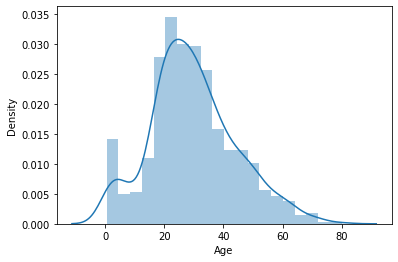

In [25]:
sns.distplot(df["Age"])
plt.show()

In [26]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
upper_boundary = df["Age"].mean() + 3*df["Age"].std()
upper_boundary

73.27860964406095

In [28]:
lower_boundary = df["Age"].mean() - 3*df["Age"].std()
lower_boundary

-13.88037434994331

In [29]:
df = df[(df["Age"] >= lower_boundary) & (df["Age"] <= upper_boundary)]

Looking at a new distribution of age column without the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


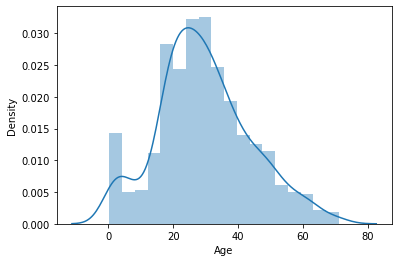

In [39]:
sns.distplot(df["Age"])

Fare is a highly skewed distribution.

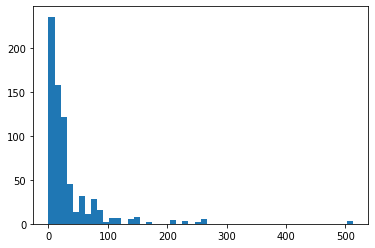

In [31]:
plt.hist(df["Fare"], bins=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


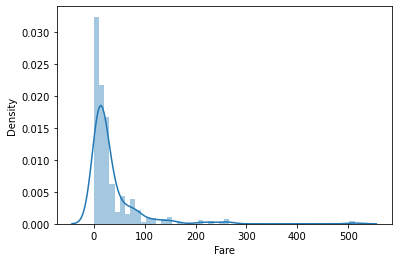

In [32]:
sns.distplot(df["Fare"])

In [33]:
df["Fare"].describe()

count    712.000000
mean      34.738916
std       52.983378
min        0.000000
25%        8.050000
50%       15.741700
75%       33.630200
max      512.329200
Name: Fare, dtype: float64

Calculating the interquantile range and upper and lower bounds.

In [35]:
IQR = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
IQR

25.5802

In [37]:
upper_bound = df["Fare"].quantile(0.75) + 1.5*IQR
upper_bound

72.0005

In [38]:
lower_bound = df["Fare"].quantile(0.25) - 1.5*IQR
lower_bound

-30.3203

In [40]:
df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

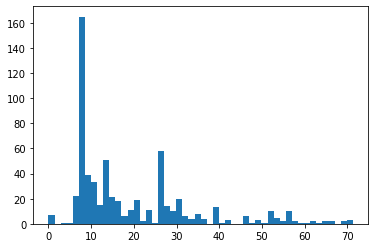

In [42]:
plt.hist(df['Fare'], bins=50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


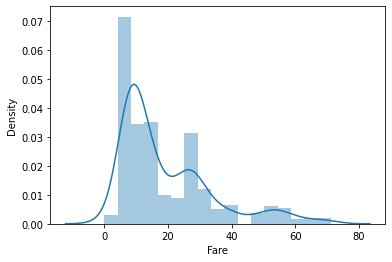

In [43]:
sns.distplot(df["Fare"])
plt.show()

## To find out the extreme outliers.

In [44]:
extreme_upper_bound = df["Fare"].quantile(0.75) + 3*IQR
extreme_upper_bound

103.0281

In [45]:
extreme_lower_bound = df["Fare"].quantile(0.25) - 3*IQR
extreme_lower_bound

-68.8156